# jqdata实现《量化投资技术分析实战》中ama均线的计算

《量化投资技术分析实战》书中有对ama均线的介绍。并且通过公众号量化投资训练营，也找到了对ama均线的一些内容，综合形成这次ama均线的计算。

参考内容：

    濮元恺，《量化投资技术分析实战》
    量化投资训练营：
    1. 不可忽视的AMA自适应移动均线交易系统（1）
    2. 不可忽视的AMA自适应移动均线交易系统（2）
    3. 股票指数（含期货）择时交易方法分享（1）

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import  jqdatasdk

In [8]:
jqdatasdk.auth(tel, pwd)

auth success


In [9]:
zz500_df = jqdatasdk.get_price('000300.XSHG', start_date='2006-02-01', end_date='2018-11-19', frequency='daily', fields=['close']) 

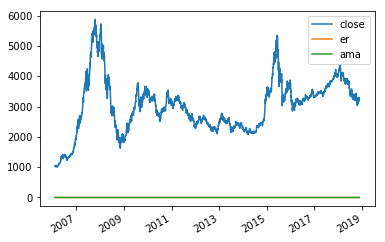

In [10]:
zz500_df['er'] = 0
zz500_df['ama'] = 0
zz500_df.plot()

# ama计算方法与关键参数
## ER效率系数

步骤1：价格方向

　　价格方向被表示为整个时间段中的净价格变化。比如，使用n天的间隔（或n小时）：

　　direction = price – price[n];

　　其中，direction是当前价格差或方向数值，price是当前价格（当日收盘价或小时收盘价），price[n]是n日前的收盘价（或n个周期前）。

步骤2：波动性

　　波动性是市场噪音的总数量，它可以用许多不同的方法定义，但是这个计算使用了所有“日到日”或“小时到小时”的价格变化的总和（每一个都作为一个正数），在同样的n个周期上。

　　如下表达：

　　volatility = @sum(@abs(price – price[1]), n);

　　其中，volatility是指波动性数值，@abs是绝对值函数，@sum(value, n)是n个周期中的数值之和函数。

步骤3：效率系数（ER）

　　以上两个成分被组合起来，以表达方向移动对噪音之比，称之为效率系数，ER：

　　Efficiency_Ratio = direction/volativity;
 ## 平滑系数
 　　fastest = 2/(N+1) = 2/(2+1) = 0.6667;

　　slowest = 2/(N+1) = 2/(30+1) = 0.0645;

　　smooth = ER*(fastest - slowest) + slowest;

　　c = smooth*smooth;
 ## AMA均线计算
    AMA = AMA[1] + c*(price – AMA[1]);

In [11]:
def cal_ama(last_ama, cp_df, var_er = 14, fastest_N = 2, slowest_N = 30):
    fastest = 2/(fastest_N+1)
    slowest = 2/(slowest_N+1)
    cp_df = cp_df[-var_er : ]
    direction = cp_df.iloc[-1] - cp_df.iloc[0]
    print("direction           ==>" + str(direction))
    er_df = cp_df.diff()
    er_df = er_df.apply(lambda x : abs(x))
    volatility = er_df.sum()
    print("volatility           ==>" + str(volatility))
    efficiency_ratio  = direction / volatility
    print("efficiency_ratio==>" + str(efficiency_ratio))
    smooth = efficiency_ratio*(fastest - slowest) + slowest;
    c = smooth* smooth
    print("c                       ==>" + str(c))
    last_ama = last_ama + c*(cp_df.iloc[-1] - last_ama)
    ama = last_ama
    print("ama==>" + str(ama))
    
    return ama, efficiency_ratio

In [12]:
last_ama = 0
timeperiod = 14
pos = 0
for index, row in zz500_df.iterrows():
    if pos < timeperiod:
        last_ama = zz500_df[0:pos]['close'].mean()
        print("last_ama==>" + str(last_ama))
        pos += 1
        continue
    
    cp_df = zz500_df[pos - timeperiod:pos]['close']
    
    ama, efficiency_ratio = cal_ama(last_ama, cp_df)

    zz500_df.loc[index,'er'] = efficiency_ratio
    zz500_df.loc[index,'ama'] = ama
    
    last_ama = ama
    
    pos += 1

last_ama==>nan
last_ama==>1033.234
last_ama==>1031.5855
last_ama==>1032.081
last_ama==>1028.9605
last_ama==>1029.6358
last_ama==>1029.9655
last_ama==>1031.1891428571428
last_ama==>1032.498
last_ama==>1031.1227777777776
last_ama==>1030.0473
last_ama==>1029.282909090909
last_ama==>1030.0773333333334
last_ama==>1030.677923076923
direction           ==>8.139000000000124
volatility           ==>88.06500000000005
efficiency_ratio==>0.09242037131664246
c                       ==>0.014440133198331316
ama==>1030.8323614122587
direction           ==>19.507000000000062
volatility           ==>92.83899999999994
efficiency_ratio==>0.21011643813483638
c                       ==>0.036495462127430864
ama==>1031.511601763467
direction           ==>14.773000000000138
volatility           ==>91.30299999999988
efficiency_ratio==>0.1618019123139454
c                       ==>0.026226259956178687
ama==>1031.9399657115862
direction           ==>33.410999999999945
volatility           ==>82.995
efficiency_rat

direction           ==>370.693
volatility           ==>630.9049999999995
efficiency_ratio==>0.5875575562089383
c                       ==>0.1749867928407658
ama==>2242.2770993068048
direction           ==>334.21799999999985
volatility           ==>594.4299999999994
efficiency_ratio==>0.5622495499890655
c                       ==>0.16246945388603617
ama==>2254.432722773328
direction           ==>416.15999999999985
volatility           ==>670.4839999999995
efficiency_ratio==>0.6206859522374885
c                       ==>0.19207402668469645
ama==>2281.6419826415254
direction           ==>450.2660000000001
volatility           ==>704.5899999999997
efficiency_ratio==>0.6390468215557988
c                       ==>0.20188712900523997
ama==>2323.971862371636
direction           ==>441.038
volatility           ==>695.3619999999996
efficiency_ratio==>0.6342566893215336
c                       ==>0.1993034373444891
ama==>2360.6752122159282
direction           ==>463.5450000000001
volatility      

volatility           ==>1107.6059999999989
efficiency_ratio==>0.07603425766924297
c                       ==>0.012166133715552816
ama==>5274.636188786354
direction           ==>266.5
volatility           ==>1112.0299999999988
efficiency_ratio==>0.2396518079548216
c                       ==>0.043606875780471975
ama==>5261.685636157184
direction           ==>208.53799999999956
volatility           ==>1169.9919999999993
efficiency_ratio==>0.17823882556461898
c                       ==>0.029529925116319217
ama==>5249.7438337741705
direction           ==>-12.161000000000058
volatility           ==>1004.0529999999999
efficiency_ratio==>-0.01211191042703927
c                       ==>0.003274464365186458
ama==>5248.369099571713
direction           ==>208.8769999999995
volatility           ==>1015.7670000000007
efficiency_ratio==>0.2056347567896962
c                       ==>0.035471657416781426
ama==>5237.653675880649
direction           ==>264.52099999999973
volatility           ==>1071.4110

ama==>3089.565078390878
direction           ==>-170.66399999999976
volatility           ==>788.0119999999988
efficiency_ratio==>-0.21657538210078023
c                       ==>0.004342131749166144
ama==>3088.3303711769604
direction           ==>-12.190999999999804
volatility           ==>700.6949999999988
efficiency_ratio==>-0.017398440120166156
c                       ==>0.0029202836597092153
ama==>3087.6074772353268
direction           ==>27.554000000000087
volatility           ==>660.9499999999989
efficiency_ratio==>0.04168847870489467
c                       ==>0.008031541662480015
ama==>3085.081898905833
direction           ==>-14.989000000000033
volatility           ==>703.492999999999
efficiency_ratio==>-0.02130653752062928
c                       ==>0.002671482498679977
ama==>3084.061384846961
direction           ==>-93.76899999999978
volatility           ==>624.7129999999993
efficiency_ratio==>-0.15009932561032008
c                       ==>0.0006690634365248097
ama==>3083.818

efficiency_ratio==>0.31958480972763365
c                       ==>0.06602550922022075
ama==>2805.3516045921388
direction           ==>120.47200000000021
volatility           ==>414.0799999999995
efficiency_ratio==>0.2909389489953641
c                       ==>0.05745857024514389
ama==>2814.2694272480367
direction           ==>176.73000000000002
volatility           ==>415.8999999999992
efficiency_ratio==>0.4249338783361394
c                       ==>0.10264993942022477
ama==>2832.2665866698417
direction           ==>211.6189999999997
volatility           ==>381.0109999999995
efficiency_ratio==>0.5554144106075677
c                       ==>0.15916845522504056
ama==>2852.857002163786
direction           ==>165.60899999999992
volatility           ==>427.0209999999993
efficiency_ratio==>0.3878240180225333
c                       ==>0.08883056570175375
ama==>2857.6031302664546
direction           ==>213.4760000000001
volatility           ==>474.88799999999947
efficiency_ratio==>0.4495291521

c                       ==>0.17896468902199825
ama==>2781.530684152481
direction           ==>230.17399999999998
volatility           ==>412.71600000000035
efficiency_ratio==>0.5577055408561814
c                       ==>0.16027117103959304
ama==>2783.381065443385
direction           ==>230.57799999999997
volatility           ==>413.12000000000035
efficiency_ratio==>0.5581380712625866
c                       ==>0.16047977409680061
ama==>2787.8221722094004
direction           ==>219.80300000000034
volatility           ==>423.895
efficiency_ratio==>0.5185317118626083
c                       ==>0.1419407720565786
ama==>2788.9437637466563
direction           ==>216.62000000000035
volatility           ==>420.712
efficiency_ratio==>0.514889045237598
c                       ==>0.14029282971995544
ama==>2799.434894697765
direction           ==>201.75800000000027
volatility           ==>405.8499999999999
efficiency_ratio==>0.4971245534064317
c                       ==>0.13239406040297055
ama==>

c                       ==>0.013502444727102362
ama==>3146.757762506136
direction           ==>-123.92000000000007
volatility           ==>309.48599999999897
efficiency_ratio==>-0.40040583418959336
c                       ==>0.031183483956873887
ama==>3142.311472852031
direction           ==>-144.75800000000027
volatility           ==>330.32399999999916
efficiency_ratio==>-0.43823034354149454
c                       ==>0.03974620702574541
ama==>3134.89457334971
direction           ==>-129.67899999999963
volatility           ==>345.4029999999998
efficiency_ratio==>-0.3754425989351561
c                       ==>0.026100610536949186
ama==>3131.017443192721
direction           ==>-135.11699999999973
volatility           ==>339.9649999999997
efficiency_ratio==>-0.39744385451443487
c                       ==>0.03055675363845405
ama==>3127.1442083427482
direction           ==>-111.98700000000008
volatility           ==>325.6149999999998
efficiency_ratio==>-0.34392457349937855
c               

c                       ==>0.10510459493441904
ama==>2589.452487648395
direction           ==>-92.27400000000034
volatility           ==>332.32800000000043
efficiency_ratio==>-0.2776594208131732
c                       ==>0.010542492502241376
ama==>2588.644716731844
direction           ==>-65.7159999999999
volatility           ==>319.7660000000001
efficiency_ratio==>-0.20551278122126768
c                       ==>0.003508607838660063
ama==>2588.403272877303
direction           ==>-128.3739999999998
volatility           ==>306.47599999999966
efficiency_ratio==>-0.41887129824195024
c                       ==>0.035234086186248334
ama==>2585.11743808725
direction           ==>-110.22499999999991
volatility           ==>324.62499999999955
efficiency_ratio==>-0.33954562957258394
c                       ==>0.019583610650151607
ama==>2583.838051807756
direction           ==>-64.4090000000001
volatility           ==>279.30499999999984
efficiency_ratio==>-0.230604536259645
c                     

c                       ==>0.016572025391762685
ama==>2707.281597739271
direction           ==>-148.64699999999993
volatility           ==>342.33100000000104
efficiency_ratio==>-0.43422009692373603
c                       ==>0.038789198424613223
ama==>2702.9137556540386
direction           ==>-74.70099999999957
volatility           ==>416.2770000000014
efficiency_ratio==>-0.17945022184747011
c                       ==>0.0018957245057566478
ama==>2702.8576673162993
direction           ==>-102.8390000000004
volatility           ==>397.12100000000146
efficiency_ratio==>-0.2589613744929128
c                       ==>0.008357177927126556
ama==>2702.5733421891596
direction           ==>-230.1289999999999
volatility           ==>516.0730000000012
efficiency_ratio==>-0.44592334805347184
c                       ==>0.04161471674457783
ama==>2696.0457267099337
direction           ==>-137.0630000000001
volatility           ==>577.1910000000007
efficiency_ratio==>-0.23746558764776293
c             

ama==>2281.3926175128245
direction           ==>-49.077999999999975
volatility           ==>334.2099999999996
efficiency_ratio==>-0.1468477903114809
c                       ==>0.0005716090493019328
ama==>2281.3251747229488
direction           ==>-113.42599999999993
volatility           ==>288.4559999999997
efficiency_ratio==>-0.3932176831128493
c                       ==>0.02967354558730436
ama==>2277.550190089319
direction           ==>-106.5909999999999
volatility           ==>295.2909999999997
efficiency_ratio==>-0.3609693488795798
c                       ==>0.02336060313071109
ama==>2275.2473207526955
direction           ==>-100.8760000000002
volatility           ==>301.0059999999994
efficiency_ratio==>-0.335129532301683
c                       ==>0.018846429624317797
ama==>2273.647686300429
direction           ==>-95.28099999999995
volatility           ==>295.41099999999915
efficiency_ratio==>-0.3225370754643538
c                       ==>0.016822023688510383
ama==>2272.1442232103

direction           ==>340.47800000000007
volatility           ==>698.0119999999997
efficiency_ratio==>0.4877824450009458
c                       ==>0.1283320218580746
ama==>3354.9610025153675
direction           ==>424.3130000000001
volatility           ==>781.8469999999998
efficiency_ratio==>0.5427059258397107
c                       ==>0.1531210070728347
ama==>3398.8424203371446
direction           ==>337.65700000000015
volatility           ==>696.1549999999997
efficiency_ratio==>0.48503135077676707
c                       ==>0.12714788268691576
ama==>3429.639745592943
direction           ==>283.192
volatility           ==>641.6899999999996
efficiency_ratio==>0.44132213374059154
c                       ==>0.10907066964515139
ama==>3452.9972572458005
direction           ==>213.33199999999988
volatility           ==>711.5499999999997
efficiency_ratio==>0.29981308411214946
c                       ==>0.060048884397379904
ama==>3459.3781563523116
direction           ==>163.55600000000004

direction           ==>-80.92599999999993
volatility           ==>292.8320000000008
efficiency_ratio==>-0.2763564091356126
c                       ==>0.010381986043961556
ama==>3738.9729540945295
direction           ==>-276.24599999999964
volatility           ==>488.1520000000005
efficiency_ratio==>-0.5659016044182946
c                       ==>0.07630954660661593
ama==>3725.0860699965365
direction           ==>-267.2340000000004
volatility           ==>497.16399999999976
efficiency_ratio==>-0.5375167952627312
c                       ==>0.06715866974884604
ama==>3714.4297305319337
direction           ==>-203.62800000000016
volatility           ==>484.12599999999975
efficiency_ratio==>-0.4206095107472027
c                       ==>0.03562811555128912
ama==>3710.056958998501
direction           ==>-24.287000000000262
volatility           ==>565.3029999999999
efficiency_ratio==>-0.04296280048045078
c                       ==>0.001493517615345459
ama==>3710.074728932325
direction          

ama==>3315.165140142991
direction           ==>-10.455600000000231
volatility           ==>208.77800000000025
efficiency_ratio==>-0.05007998927090124
c                       ==>0.0011806396011476384
ama==>3315.1367527970265
direction           ==>-38.44770000000017
volatility           ==>211.69510000000037
efficiency_ratio==>-0.18161828025306254
c                       ==>0.0020111113421649594
ama==>3315.0573737239483
direction           ==>-99.39649999999983
volatility           ==>261.5117
efficiency_ratio==>-0.3800843327468707
c                       ==>0.02701153266192101
ama==>3312.497394241817
direction           ==>-101.87129999999979
volatility           ==>259.03690000000006
efficiency_ratio==>-0.3932694531165242
c                       ==>0.029684286403518015
ama==>3310.367760590154
direction           ==>-109.92679999999973
volatility           ==>267.0924
efficiency_ratio==>-0.41156843099990764
c                       ==>0.03360256452041367
ama==>3307.6971174530113
directi

ama==>3863.22378726323
direction           ==>71.01089999999976
volatility           ==>135.4095000000002
efficiency_ratio==>0.5244159383204255
c                       ==>0.1446231219829314
ama==>3870.487109386737
direction           ==>75.25120000000015
volatility           ==>131.16919999999982
efficiency_ratio==>0.573695654162717
c                       ==>0.16807316708327139
ama==>3877.643948987868
direction           ==>106.4322000000002
volatility           ==>162.17579999999998
efficiency_ratio==>0.6562767071289317
c                       ==>0.21131811492312888
ama==>3891.7005449269814
direction           ==>113.45800000000008
volatility           ==>155.1500000000001
efficiency_ratio==>0.7312794070254593
c                       ==>0.2548800019209855
ama==>3901.7807826719654
direction           ==>106.07040000000006
volatility           ==>156.55740000000014
efficiency_ratio==>0.6775176388979376
c                       ==>0.22324088414051887
ama==>3907.377703394755
direction    

# 显示ama

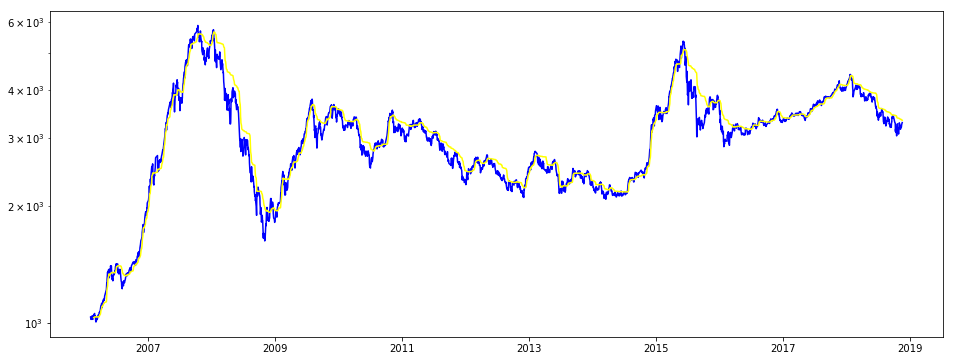

In [13]:
fig = plt.figure(figsize=(16,6))
ax1 = fig.add_subplot(1,1,1)
ax1.semilogy(zz500_df.index, zz500_df['close'], color='blue', label='close')
ax1.semilogy(zz500_df.index, zz500_df['ama'], color='yellow', label='close')

# ax2 = ax1.twinx()
# ax2.plot(zz500_df.index, zz500_df['er'], color='red', label='close')

plt.show()

# 其他参数计算
## 1. 20日均线
## 2. ama均线标准差
在产生买入卖出信号时，有两种过滤条件，一种是是ama均线的波动率，另外一种是ama均线的差分波动率，都在此处进行计算

In [14]:
zz500_df['ma10'] = 0
zz500_df['ma20'] = 0
zz500_df['ama_diff_std20'] = 0
zz500_df['ama_std30'] = 0

ma10_pos = 10
ma20_pos = 20
ama_diff_std20_pos = 20
ama30_pos = 30
pos = 0
for index, row in zz500_df.iterrows():
    if pos < 10:
        pos += 1
        continue
        
    ma10 = zz500_df[pos-ma10_pos:pos]['close'].mean()
    zz500_df.loc[index,'ma10'] = ma10
    
    if pos < 20:
        pos += 1
        continue
        
    ma20 =  zz500_df[pos-ma20_pos:pos]['close'].mean()
    zz500_df.loc[index,'ma20'] = ma20
    
    if pos < 50:
        pos += 1
        continue
        
    ama_diff_std20 =  np.std(zz500_df[pos-ama_diff_std20_pos:pos]['ama'].diff(), ddof = 1)
    zz500_df.loc[index,'ama_diff_std20'] = ama_diff_std20
    
    ama_std30 =  np.std(zz500_df[pos-ama30_pos:pos]['ama'], ddof = 1)
    zz500_df.loc[index,'ama_std30'] = ama_std30
    
    pos += 1
#     break
    

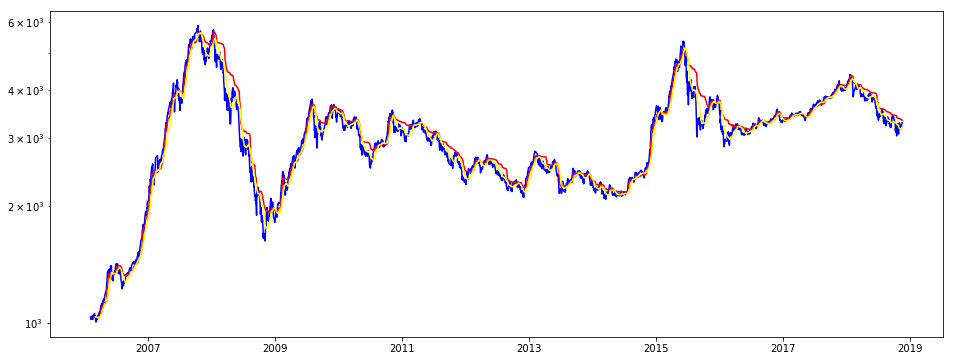

In [15]:
fig = plt.figure(figsize=(16,6))
ax1 = fig.add_subplot(1,1,1)
ax1.semilogy(zz500_df.index, zz500_df['close'], color='blue', label='close')
ax1.semilogy(zz500_df.index, zz500_df['ama'], color='red', label='close')
ax1.semilogy(zz500_df.index, zz500_df['ma20'], color='yellow', label='close')

# ax2 = ax1.twinx()
# ax2.plot(zz500_df.index, zz500_df['er'], color='red', label='close')

plt.show()

In [16]:
# 保存到csv文件中，为后续回测，提供数据
zz500_df.to_csv('d:\\ama.csv')

# ama均线策略回测
在本地joinquant金融终端中读取存储的ama均线的数据，按照量化投资训练营中所给出的参数，进行回测，回测时直接读取的ama.csv中的每日ama和ama_std的数据，回测效果如下：

核心公式　
1. AMA均线 = 按照AMA公式计算价格，参数2-30，

2. ER效率系数参数14

3. 过滤器 = AMA均线的30日标准差 * 过滤器系数（0.1）

核心规则：

1. 两日AMA差值大于过滤器，做多

2. 两日AMA差值小于过滤器，平多
![title](img/ama_bt.PNG)

# 与量化投资训练营中的回测进行对比
使用同样的参数进行构造，与量化投资训练营的回测数据还是有些许差异
![title](img/ama_lhtzxly.jpeg)